# Postprocessing Notebook for IDSM2

In [15]:
#interactive widget requires pip install ipympl  
%matplotlib widget
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np

In [16]:
df = pd.read_csv("./simulations/tb_ideal_idsm2.txt", sep='\s+')

In [17]:
df

,time,vo1,vo2,q,p1,p2
0,0.000000e+00,0.000000e+00,0.000000e+00,6.509707e-08,0.0,1.200000
1,1.000000e-12,8.331816e-14,3.454192e-32,-1.663243e-05,0.0,1.188000
2,2.000000e-12,1.418297e-13,1.211011e-31,-2.510047e-05,0.0,1.176000
3,4.000000e-12,1.095666e-13,4.227630e-31,-2.629955e-05,0.0,1.152000
4,6.983858e-12,-1.116073e-13,1.143898e-30,-1.075972e-05,0.0,1.116194
...,...,...,...,...,...,...
20494,6.496058e-05,-6.389010e-02,-9.898986e-01,6.509685e-08,0.0,1.200000
20495,6.497058e-05,-6.389010e-02,-9.898986e-01,6.509685e-08,0.0,1.200000
20496,6.498058e-05,-6.389010e-02,-9.898986e-01,6.509685e-08,0.0,1.200000
20497,6.499058e-05,-6.389010e-02,-9.898986e-01,6.509685e-08,0.0,1.200000


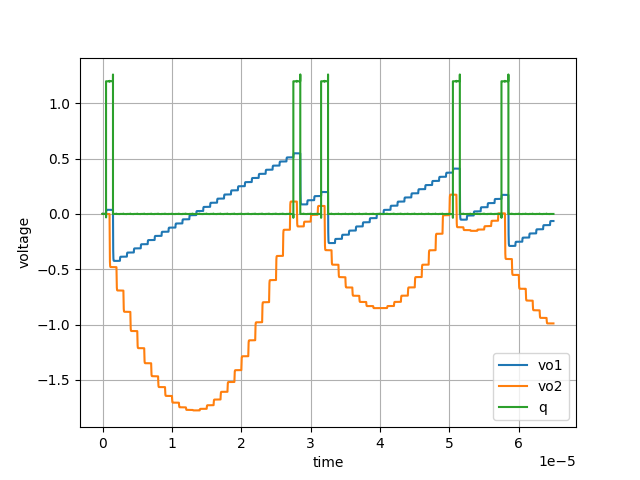

In [18]:
plt.figure(1)
plt.clf()
plt.plot(df['time'], df['vo1'], label="vo1")
plt.plot(df['time'], df['vo2'], label="vo2")
plt.plot(df['time'], df['q'], label="q")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [19]:
# sample q and count number of ones
t = df['time']
ts = np.arange(1.5e-6, 1.5e-6+64*1e-6, 1e-6)
q = df['q']
interp_func = interp1d(t, q)
qsamp = interp_func(ts)
qsamp[qsamp > 0.5] = 1
qsamp[qsamp < 0.5] = 0
csum = np.cumsum(qsamp)
dout = np.cumsum(csum)
vin = 0.075*64.0*65.0/2.0

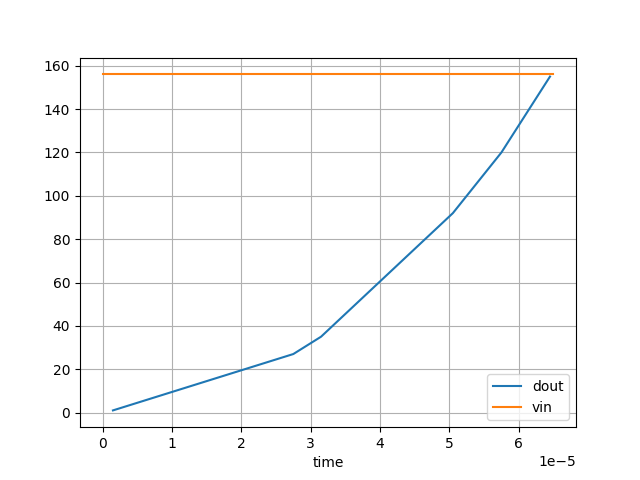

In [20]:
plt.figure(2)
plt.clf()
plt.plot(ts, dout, label="dout")
plt.plot([0, 65e-6], [vin, vin], label="vin")
plt.xlabel("time")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [21]:
dout[-1]

155.0

In [22]:
vin

156.0